In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

In [3]:
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio']
list_of_df = []
i=1
for m in months:
    
    tempdf = pd.read_csv('data/Teaté - Venta '+m+' 2020.csv', encoding='ISO-8859-1', sep=';')
    tempdf['Mes']=m
    tempdf['Mes_number']=i
    i+=1
    
    list_of_df.append(tempdf)


In [4]:
final_df = pd.concat(list_of_df)

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325094 entries, 0 to 55194
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Pedido                       325094 non-null  int64  
 1   Fecha Pedido                 325094 non-null  object 
 2   Tienda                       325094 non-null  int64  
 3   Nombre Tienda                325094 non-null  object 
 4   Dirección Tienda             325094 non-null  object 
 5   Fabricante                   325094 non-null  int64  
 6   Nombre Fabricante            325094 non-null  object 
 7   PosPed                       325094 non-null  int64  
 8   Material                     325094 non-null  int64  
 9   Nombre Material              325094 non-null  object 
 10  Cantidad de pedido           325094 non-null  int64  
 11  UM                           325094 non-null  object 
 12  Valor Unitario Pedido        325094 non-null  float64
 13  

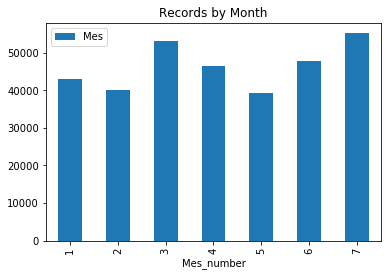

In [5]:

final_df[['Mes_number','Mes']].sort_values(by='Mes_number', ascending=True).groupby('Mes_number').count().plot(kind='bar')
plt.title('Records by Month');

final_df[['Mes', 'Pedido']].groupby('Mes', as_index=False, sort=False).count()
recordsdf = final_df[['Mes_number', 'Pedido']].groupby('Mes_number', as_index=False, sort=False).count()

In [6]:
final_df['Pedido'].count()

325094

<h1> Analisis de número de pedidos promedio mensual por tienda y promedio de productos por pedido

In [18]:
pedidos_tiendadf = final_df[['Mes_number','Mes','Pedido', 'Tienda']].groupby(['Tienda','Mes_number', 'Pedido'], as_index=False).agg({'Mes':'count'})
pedidos_tiendadf.rename({'Mes': 'Num productos en el pedido'}, axis=1, inplace=True)

pedidos_tiendadf

,Tienda,Mes_number,Pedido,Num productos en el pedido
0,20000000,1,1000099658,2
1,20000000,1,1000103995,2
2,20000000,2,1000105041,3
3,20000000,2,1000107695,2
4,20000000,2,1000110118,3
...,...,...,...,...
95718,20013886,7,1000189080,2
95719,20013887,7,1000189276,4
95720,20013888,7,1000189278,2
95721,20013889,7,1000189282,5


In [19]:
pedidos_tiendadf2 = pedidos_tiendadf[['Mes_number','Pedido', 'Tienda','Num productos en el pedido']].groupby(['Tienda','Mes_number'], as_index=False).agg({'Pedido':'count', 'Num productos en el pedido':'mean'})
pedidos_tiendadf2.rename({'Pedido': 'Num pedidos mensuales', 'Num productos en el pedido':'Num promedio productos en el pedido' }, axis=1, inplace=True)

pedidos_tiendadf2.head(10)

,Tienda,Mes_number,Num pedidos mensuales,Num promedio productos en el pedido
0,20000000,1,2,2.000000
1,20000000,2,4,2.750000
2,20000000,3,6,3.166667
3,20000000,4,4,2.750000
4,20000000,5,2,2.500000
5,20000000,6,1,2.000000
6,20000000,7,3,2.000000
7,20000002,4,1,10.000000
8,20000002,6,1,15.000000
9,20000002,7,3,2.666667


In [20]:
pedidos_tiendadf3 = pedidos_tiendadf2[['Mes_number','Num pedidos mensuales',  'Tienda', 'Num promedio productos en el pedido']].groupby(['Tienda'], as_index=False).agg({'Num pedidos mensuales':'mean', 'Num promedio productos en el pedido':'mean'})
pedidos_tiendadf3.rename({'Num pedidos mensuales': 'Num promedio de pedidos mensuales'}, axis=1, inplace=True)

pedidos_tiendadf3 

,Tienda,Num promedio de pedidos mensuales,Num promedio productos en el pedido
0,20000000,3.142857,2.452381
1,20000002,1.666667,9.222222
2,20000005,1.500000,2.083333
3,20000006,6.500000,1.041667
4,20000007,5.285714,3.746032
...,...,...,...
9330,20013886,1.000000,2.000000
9331,20013887,1.000000,4.000000
9332,20013888,1.000000,2.000000
9333,20013889,1.000000,5.000000


In [21]:

def calculate_loyalty(promedio):
    if np.isnan(promedio):
        return "Tienda sin datos"
    elif promedio > 4:
        return "Lealtad alta"
    elif promedio > 2:
        return "Lealtad media"
    else:
        return "Lealtad baja"
    
pedidos_tiendadf3['lealtad'] = pedidos_tiendadf3['Num promedio de pedidos mensuales'].apply(calculate_loyalty)
pedidos_tiendadf3

,Tienda,Num promedio de pedidos mensuales,Num promedio productos en el pedido,lealtad
0,20000000,3.142857,2.452381,Lealtad media
1,20000002,1.666667,9.222222,Lealtad baja
2,20000005,1.500000,2.083333,Lealtad baja
3,20000006,6.500000,1.041667,Lealtad alta
4,20000007,5.285714,3.746032,Lealtad alta
...,...,...,...,...
9330,20013886,1.000000,2.000000,Lealtad baja
9331,20013887,1.000000,4.000000,Lealtad baja
9332,20013888,1.000000,2.000000,Lealtad baja
9333,20013889,1.000000,5.000000,Lealtad baja


In [22]:
pedidos_tiendadf4 = pedidos_tiendadf3[['lealtad', 'Tienda']].groupby(['lealtad'], as_index=False).count()
pedidos_tiendadf4['Porcentaje']= pedidos_tiendadf4['Tienda']/sum(pedidos_tiendadf4['Tienda'])
pedidos_tiendadf4.sort_values(by='Tienda', ascending=False)



,lealtad,Tienda,Porcentaje
1,Lealtad baja,5638,0.603964
2,Lealtad media,2780,0.297804
0,Lealtad alta,917,0.098232


<Figure size 720x720 with 0 Axes>

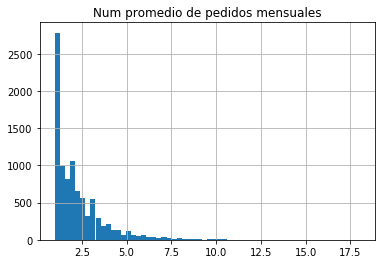

In [58]:
fig=plt.figure(figsize=(10,10)); 
pedidos_tiendadf3.hist(column="Num promedio de pedidos mensuales", bins=60);

In [ ]:
final_df2 = final_df[['rechazo']]

In [23]:
final_df.columns

Index(['Pedido', 'Fecha Pedido', 'Tienda', 'Nombre Tienda', 'Dirección Tienda',
       'Fabricante', 'Nombre Fabricante', 'PosPed', 'Material',
       'Nombre Material', 'Cantidad de pedido', 'UM', 'Valor Unitario Pedido',
       'Mon.', 'Valor Total Pedido', 'Mon..1', 'Valor Total Ped Dcto+IVA',
       'Mon..2', 'Entrega', 'Factura', 'Fecha Factura', 'PosFac',
       'Ctd.facturada', 'UM.1', 'UM.2', 'Valor Unitario Factura', 'Mon..3',
       'Valor TotalFactura', 'Mon..4', 'Descuento Teaté', 'Mon..5', 'MR',
       'Denominación Motivo Rechazo', 'FechaMovil', 'HoraMovil',
       'ValorIngresoPedido', 'Mon..6', 'ValorIngresoFactur', 'Mon..7', 'Ce.',
       'NTAT Móvil', 'Cupón Dscto', 'Valor Cupón Teaté', 'Mon..8',
       'Fecha Creación Tienda', 'MES', 'Mes', 'Mes_number', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Zona', 'Nombre ZonaComercial', 'Ruta',
       'Nombre Ruta', 'Comuna', 'Barrio', 'Población'],
      dtype='object')

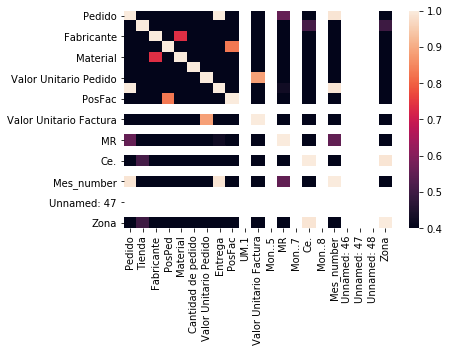

In [30]:
sns.heatmap(final_df.corr(), vmin=0.4, vmax=

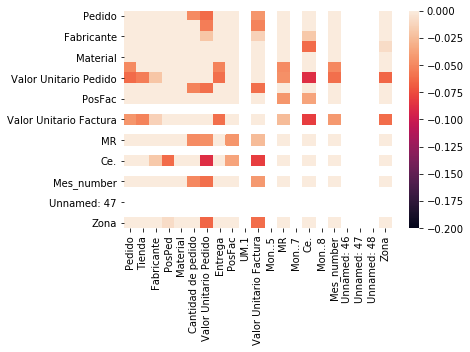

In [37]:
sns.heatmap(final_df.corr(), vmin=-0.2, vmax=0)

In [16]:
final_df.corr()

,Pedido,Tienda,Fabricante,PosPed,Material,Cantidad de pedido,Valor Unitario Pedido,Entrega,PosFac,UM.1,...,Mon..5,MR,Mon..7,Ce.,Mon..8,Mes_number,Unnamed: 46,Unnamed: 47,Unnamed: 48,Zona
Pedido,1.000000,0.139280,0.164050,0.024548,0.142996,-0.048590,-0.062073,0.999995,0.050091,NaN,...,NaN,0.555556,NaN,0.033656,NaN,0.988469,NaN,NaN,NaN,0.319451
Tienda,0.139280,1.000000,0.060921,0.035278,0.077726,0.029276,-0.054514,0.142497,0.030682,NaN,...,NaN,0.134950,NaN,0.508731,NaN,0.136490,NaN,NaN,NaN,0.498225
Fabricante,0.164050,0.060921,1.000000,0.064162,0.736915,0.008930,-0.019771,0.161496,0.068571,NaN,...,NaN,0.174319,NaN,-0.018471,NaN,0.166486,NaN,NaN,NaN,0.030878
PosPed,0.024548,0.035278,0.064162,1.000000,0.072065,0.006539,0.021624,0.018286,0.830903,NaN,...,NaN,0.029701,NaN,-0.062157,NaN,0.023660,NaN,NaN,NaN,-0.008148
Material,0.142996,0.077726,0.736915,0.072065,1.000000,0.115421,0.015962,0.148860,0.085376,NaN,...,NaN,0.141096,NaN,0.066835,NaN,0.144631,NaN,NaN,NaN,0.084547
Cantidad de pedido,-0.048590,0.029276,0.008930,0.006539,0.115421,1.000000,0.285120,-0.051968,0.020235,NaN,...,NaN,-0.047990,NaN,0.035882,NaN,-0.049341,NaN,NaN,NaN,0.033186
Valor Unitario Pedido,-0.062073,-0.054514,-0.019771,0.021624,0.015962,0.285120,1.000000,-0.060286,0.036669,NaN,...,NaN,-0.045623,NaN,-0.087858,NaN,-0.060289,NaN,NaN,NaN,-0.064489
Entrega,0.999995,0.142497,0.161496,0.018286,0.148860,-0.051968,-0.060286,1.000000,0.034229,NaN,...,NaN,0.428069,NaN,0.032754,NaN,0.988716,NaN,NaN,NaN,0.316470
PosFac,0.050091,0.030682,0.068571,0.830903,0.085376,0.020235,0.036669,0.034229,1.000000,NaN,...,NaN,-0.043746,NaN,-0.036060,NaN,0.048731,NaN,NaN,NaN,0.024125
UM.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

fig = go.Figure(data=go.Heatmap(
                   ))
fig.show()

<h1> Grafica de dispersion de precios de productos </h1>

* Se va a a agrupar por material y se va a sacar el top 20 de materiales con mas ordenes (count pedidos)
Se meten en una lista.

* Se seleccionan las columnas nombre de material (filtrando solo el top 20) y la columna precio y se hace el grafico de dispersion.

    

In [59]:
final_df.columns

Index(['Pedido', 'Fecha Pedido', 'Tienda', 'Nombre Tienda', 'Dirección Tienda',
       'Fabricante', 'Nombre Fabricante', 'PosPed', 'Material',
       'Nombre Material', 'Cantidad de pedido', 'UM', 'Valor Unitario Pedido',
       'Mon.', 'Valor Total Pedido', 'Mon..1', 'Valor Total Ped Dcto+IVA',
       'Mon..2', 'Entrega', 'Factura', 'Fecha Factura', 'PosFac',
       'Ctd.facturada', 'UM.1', 'UM.2', 'Valor Unitario Factura', 'Mon..3',
       'Valor TotalFactura', 'Mon..4', 'Descuento Teaté', 'Mon..5', 'MR',
       'Denominación Motivo Rechazo', 'FechaMovil', 'HoraMovil',
       'ValorIngresoPedido', 'Mon..6', 'ValorIngresoFactur', 'Mon..7', 'Ce.',
       'NTAT Móvil', 'Cupón Dscto', 'Valor Cupón Teaté', 'Mon..8',
       'Fecha Creación Tienda', 'MES', 'Mes', 'Mes_number', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Zona', 'Nombre ZonaComercial', 'Ruta',
       'Nombre Ruta', 'Comuna', 'Barrio', 'Población'],
      dtype='object')

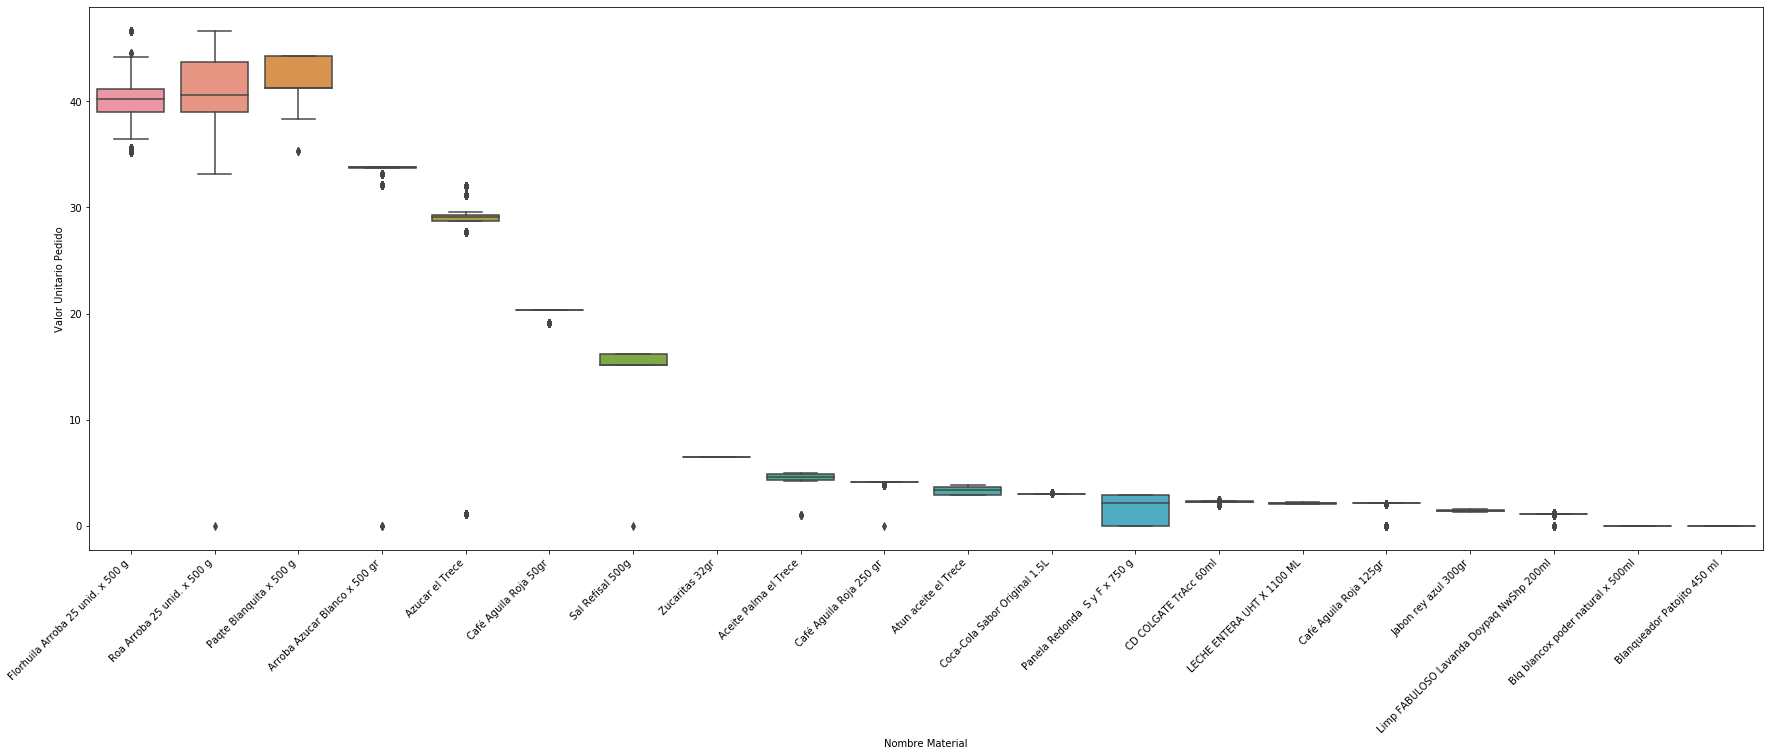

In [15]:
top_productos = final_df[['Nombre Material','Pedido']].groupby(['Nombre Material'], as_index=False).agg({'Pedido':'count'})
top20_list = top_productos.sort_values(by='Pedido', ascending=False)['Nombre Material'].head(20)

top_products_to_price_boxplot = final_df[final_df['Nombre Material'].isin(top20_list)][['Nombre Material', 'Valor Unitario Pedido']]
top_products_to_price_boxplot.sort_values(by='Valor Unitario Pedido', ascending=False, inplace=True)
top_products_to_price_boxplot

# specific order


fig = plt.figure(figsize=(30,10))
ax = fig.add_axes()
plt.xticks(rotation=45, ha='right')
p1=sns.boxplot(ax=ax, x='Nombre Material', y='Valor Unitario Pedido', data=top_products_to_price_boxplot[top_products_to_price_boxplot['Valor Unitario Pedido']<60])


#fig = px.strip(top_products_to_price_boxplot, x='Nombre Material', y='Valor Unitario Pedido')

#fig.show()

<h1> Conversion y análisis de número de pedidos y número de registros

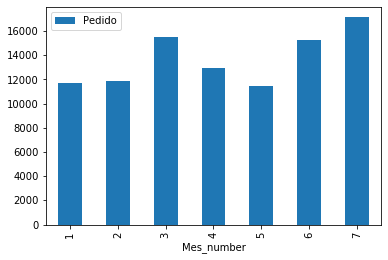

In [9]:
pedidosdf = final_df[['Mes_number','Mes','Pedido']].groupby(['Mes_number', 'Pedido'], as_index=False).count()

pedidosdf.groupby('Mes_number')[['Pedido']].count().plot(kind='bar')
pedidosdf = pedidosdf.groupby('Mes_number', as_index=False)[['Pedido']].count()

In [17]:
recordsdf

,Mes_number,Pedido
0,1,43042
1,2,40157
2,3,53260
3,4,46407
4,5,39216
5,6,47817
6,7,55195


In [18]:
pedidosdf['Records'] = recordsdf['Pedido']
pedidosdf['Avg Records by order'] =recordsdf['Pedido']/pedidosdf['Pedido']

pedidosdf = pedidosdf.reindex(columns=['Mes_number','Pedido','Records','Avg Records by order'])
pedidosdf.rename({'Pedido': 'Orders'}, axis=1, inplace=True)



pedidosdf

,Mes_number,Orders,Records,Avg Records by order
0,1,11662,43042,3.690791
1,2,11869,40157,3.383352
2,3,15467,53260,3.443460
3,4,12956,46407,3.581893
4,5,11413,39216,3.436082
5,6,15234,47817,3.138834
6,7,17122,55195,3.223630


In [19]:
pedidosdf['Orders'].sum()

95723

<h1> Análisis de Datos Nulos

In [20]:
nonnull_values = final_df['MES'].value_counts().sum()
null_values = len(final_df[final_df['MES'].isnull()]['MES'])
print('La columna MES tiene',nonnull_values,'valores no nulos y',null_values,'valores nulos')

La columna MES tiene 223492 valores no nulos y 101602 valores nulos


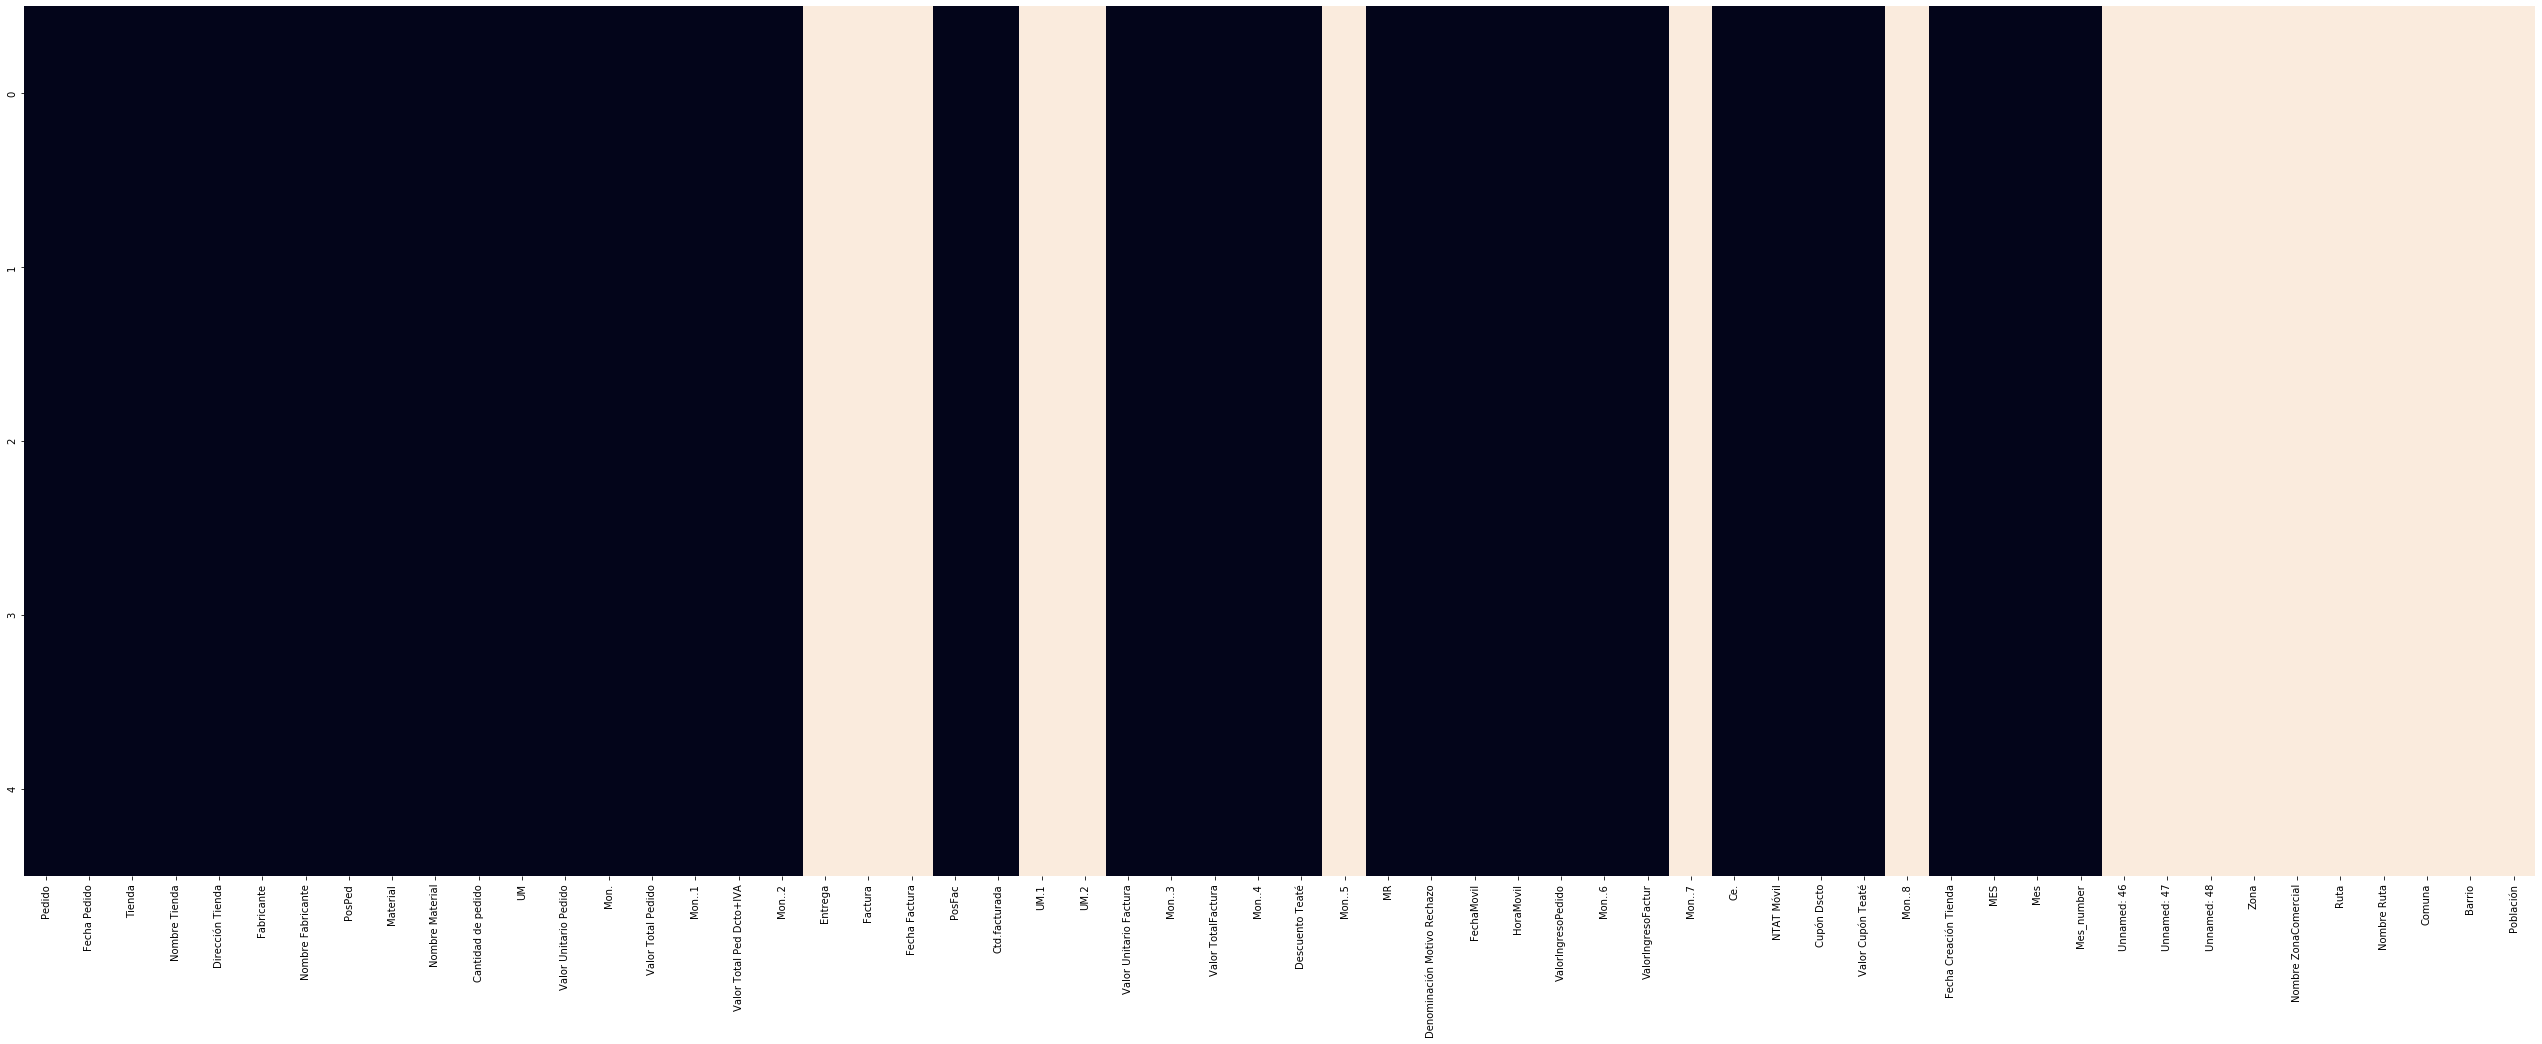

In [21]:
plt.figure(figsize=(45, 16))
sns.heatmap(final_df.head().isnull(),cbar=False)

In [22]:
list_of_df[4]['MES'].head(8)

0    Mayo
1    Mayo
2    Mayo
3    Mayo
4    Mayo
5    Mayo
6    Mayo
7    Mayo
Name: MES, dtype: object

In [23]:
final_df['Nombre Material'].unique

<bound method Series.unique of 0               Detergente Dersa Liquido Doy Pack
1            JOHNSONS baby aceite  original 50 ML
2                        Palomitas Caramelo 68 gr
3                      Detergente Rindex 10 250gr
4            JOHNSONS baby aceite  original 50 ML
                           ...                   
55190                           Chiclets  Surtido
55191         CLUB SOCIAL INTEGRAL(R)EXP24PK IPOD
55192               Copelia Panela+Areq+Coco 15gr
55193    Alimento para perro PEDIGREE Sobre Adult
55194                           Luker Amargo 125G
Name: Nombre Material, Length: 325094, dtype: object>

In [24]:
final_df['Categoria_Producto'] = np.NaN

In [25]:
final_df[['Nombre Fabricante','Nombre Material','Categoria_Producto']]

,Nombre Fabricante,Nombre Material,Categoria_Producto
0,DETERGENTES LTDA.,Detergente Dersa Liquido Doy Pack,NaN
1,JOHNSON & JOHNSON DE COLOMBIA S.A,JOHNSONS baby aceite original 50 ML,NaN
2,PRODUCTOS YUPI S.A.S,Palomitas Caramelo 68 gr,NaN
3,PROCTER & GAMBLE COLOMBIA LTDA,Detergente Rindex 10 250gr,NaN
4,JOHNSON & JOHNSON DE COLOMBIA S.A,JOHNSONS baby aceite original 50 ML,NaN
...,...,...,...
55190,MONDELEZ COLOMBIA S.A.S,Chiclets Surtido,NaN
55191,MONDELEZ COLOMBIA S.A.S,CLUB SOCIAL INTEGRAL(R)EXP24PK IPOD,NaN
55192,PRODUCTOS YUPI S.A.S,Copelia Panela+Areq+Coco 15gr,NaN
55193,MASTERFOODS COLOMBIA LTDA.,Alimento para perro PEDIGREE Sobre Adult,NaN


<h1> Análisis de fabricantes

In [26]:
list(final_df['Nombre Fabricante'].unique())

['DETERGENTES LTDA.',
 'JOHNSON & JOHNSON DE COLOMBIA S.A',
 'PRODUCTOS YUPI S.A.S',
 'PROCTER & GAMBLE COLOMBIA LTDA',
 'COMESTIBLES ALDOR S.A.S',
 'EMPAQUETADOS EL TRECE S.A.S',
 'COLOMBINA S.A',
 'DRYPERS ANDINA S.A',
 'FASSI  LA JOYA',
 'INDUSTRIAS PATOJITO S.A.S',
 'RB (HEALTH) COLOMBIA S.A.S',
 'INDUSTRIA NACIONAL DE GASEOSAS S.A.',
 'LABORATORIOS PRONABELL S.A.S',
 'HARINERA DEL VALLE S.A',
 'TEAM',
 'ORGANIZACION ROA S.A',
 'ARROZ FLORHUILA S.A',
 'MAYAGÜEZ S.A',
 'RECKITT BENCKISER COLOMBIA SA',
 'ECOLITE S.AS',
 'CASA LUKER S.A',
 'PAPELES NACIONALES S.A',
 'PREBEL S.A.',
 'COLGATE PALMOLIVE COMPAÑIA',
 'PRODUCTORA Y COMERCIALIZADORA M.J.G',
 'INVERSIONES VICOM S.A.S',
 'RÁPIDOS Y SABROSOS DE COLOMBIA S.A',
 'COMERCIALIZADORA PROCON S.A',
 'BRINSA S.A.',
 'ARROCERA LA ESMERALDA S.A.S',
 'KELLOGGS DE COLOMBIA S.A',
 'MANITOBA LTDA',
 'REFISAL',
 'MONDELEZ COLOMBIA S.A.S',
 'GRANISAL LTDA',
 'BIC COLOMBIA S A S',
 'TUCONTACTO SMS S.A.S',
 'INDU.PRODUCTOS ALIMENTICIOS DEL CAU',


In [27]:
len(list(final_df['Nombre Fabricante'].unique()))

60

,Nombre Fabricante,Records,Materiales Unicos
43,ORGANIZACION ROA S.A,37797,3
8,COLGATE PALMOLIVE COMPAÑIA,31217,55
10,COMERCIALIZADORA PROCON S.A,27212,4
18,EMPAQUETADOS EL TRECE S.A.S,17078,13
2,ARROZ FLORHUILA S.A,16725,2
50,PRODUCTOS YUPI S.A.S,13780,27
48,PROCTER & GAMBLE COLOMBIA LTDA,13357,32
24,INDUSTRIA NACIONAL DE GASEOSAS S.A.,12523,16
22,HARINERA DEL VALLE S.A,11877,16
11,COMESTIBLES ALDOR S.A.S,10924,55


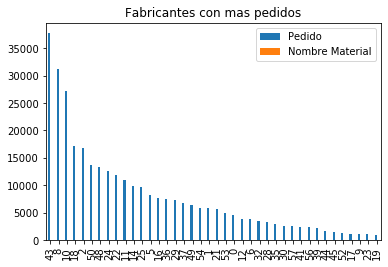

In [28]:
#fabricantesdf = final_df[['Nombre Fabricante','Pedido']].groupby('Nombre Fabricante').count().reset_index()
#fabricantesdf.sort_values(by='Pedido',  ascending=False).head(20)

fabricantesdf = final_df[['Nombre Fabricante','Pedido','Nombre Material']].groupby('Nombre Fabricante', as_index=False).agg({'Pedido':'count','Nombre Material':'nunique'})

fabricantesdf.sort_values(by='Pedido', ascending=False).head(40).plot(kind='bar')
plt.title('Fabricantes con mas pedidos');

fabricantesdf.rename({'Pedido':'Records','Nombre Material':'Materiales Unicos'}, axis=1, inplace=True)
fabricantesdf.sort_values(by='Records',  ascending=False).head(60)


In [29]:
final_df.columns

Index(['Pedido', 'Fecha Pedido', 'Tienda', 'Nombre Tienda', 'Dirección Tienda',
       'Fabricante', 'Nombre Fabricante', 'PosPed', 'Material',
       'Nombre Material', 'Cantidad de pedido', 'UM', 'Valor Unitario Pedido',
       'Mon.', 'Valor Total Pedido', 'Mon..1', 'Valor Total Ped Dcto+IVA',
       'Mon..2', 'Entrega', 'Factura', 'Fecha Factura', 'PosFac',
       'Ctd.facturada', 'UM.1', 'UM.2', 'Valor Unitario Factura', 'Mon..3',
       'Valor TotalFactura', 'Mon..4', 'Descuento Teaté', 'Mon..5', 'MR',
       'Denominación Motivo Rechazo', 'FechaMovil', 'HoraMovil',
       'ValorIngresoPedido', 'Mon..6', 'ValorIngresoFactur', 'Mon..7', 'Ce.',
       'NTAT Móvil', 'Cupón Dscto', 'Valor Cupón Teaté', 'Mon..8',
       'Fecha Creación Tienda', 'MES', 'Mes', 'Mes_number', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Zona', 'Nombre ZonaComercial', 'Ruta',
       'Nombre Ruta', 'Comuna', 'Barrio', 'Población', 'Categoria_Producto'],
      dtype='object')

In [58]:
pivotfabricantesdf = pd.pivot_table(final_df, values='Pedido', index='Nombre Fabricante', columns='Mes_number', aggfunc='count')
pivotfabricantesdf.sort_values(by=1, ascending=False) 


Mes_number,1,2,3,4,5,6,7
Nombre Fabricante,,,,,,,
ORGANIZACION ROA S.A,4650.0,3919.0,7499.0,3837.0,2823.0,7425.0,7644.0
COMERCIALIZADORA PROCON S.A,4447.0,3741.0,3905.0,2984.0,3000.0,3835.0,5300.0
COLGATE PALMOLIVE COMPAÑIA,3413.0,5127.0,3170.0,4231.0,5005.0,4974.0,5297.0
PRODUCTOS YUPI S.A.S,2656.0,2032.0,2003.0,2356.0,1172.0,1811.0,1750.0
PROCTER & GAMBLE COLOMBIA LTDA,2629.0,1569.0,1896.0,1733.0,1710.0,1968.0,1852.0
BRINSA S.A.,2293.0,1190.0,1019.0,961.0,1430.0,608.0,749.0
INDUSTRIA NACIONAL DE GASEOSAS S.A.,2179.0,2095.0,1974.0,1557.0,1545.0,1483.0,1690.0
ARROZ FLORHUILA S.A,1814.0,1900.0,3473.0,1226.0,1414.0,3730.0,3168.0
EMPAQUETADOS EL TRECE S.A.S,1651.0,2133.0,4375.0,1629.0,1301.0,2278.0,3711.0


In [31]:
pivotfabricantesdf = pd.pivot_table(final_df, values='Pedido', index='Nombre Fabricante', columns='Población', aggfunc='count')
pivotfabricantesdf.sort_values(by='Medellín', ascending=False) 
#pivotfabricantesdf

Población,Bello,CALI,Caldas,Cali,Candelaria,Envigado,Estrella,Itagui,Itaguí,Jamundi,...,Medellín,Palmira,Portal de los almendros,Sabaneta,San Antonio De Prado,San Antonio Prados,Santiago de cali,Villa Gorgona,Yumbo,cali
Nombre Fabricante,,,,,,,,,,,,,,,,,,,,,
EMPAQUETADOS EL TRECE S.A.S,2.0,NaN,210.0,NaN,NaN,475.0,125.0,123.0,334.0,NaN,...,6295.0,NaN,NaN,110.0,24.0,13.0,NaN,NaN,NaN,NaN
COLGATE PALMOLIVE COMPAÑIA,10.0,NaN,204.0,17.0,79.0,683.0,42.0,80.0,295.0,3.0,...,5174.0,239.0,NaN,110.0,30.0,9.0,8612.0,14.0,1776.0,NaN
ORGANIZACION ROA S.A,NaN,1.0,122.0,1.0,266.0,352.0,82.0,164.0,370.0,3.0,...,5098.0,525.0,NaN,69.0,2.0,8.0,12232.0,NaN,766.0,3.0
DETERGENTES LTDA.,1.0,NaN,47.0,1.0,41.0,241.0,38.0,55.0,100.0,4.0,...,2105.0,87.0,NaN,46.0,4.0,10.0,1588.0,3.0,265.0,2.0
INDUSTRIA NACIONAL DE GASEOSAS S.A.,3.0,NaN,171.0,NaN,70.0,145.0,21.0,33.0,76.0,1.0,...,1634.0,206.0,NaN,64.0,9.0,7.0,2354.0,NaN,878.0,NaN
PRODUCTORA Y COMERCIALIZADORA M.J.G,4.0,NaN,83.0,NaN,18.0,118.0,30.0,77.0,154.0,1.0,...,1371.0,48.0,NaN,22.0,20.0,1.0,1069.0,1.0,164.0,NaN
PROCTER & GAMBLE COLOMBIA LTDA,1.0,NaN,65.0,NaN,32.0,162.0,22.0,43.0,87.0,7.0,...,1245.0,121.0,NaN,55.0,28.0,11.0,3926.0,5.0,683.0,NaN
KELLOGG DE COLOMBIA S.A,NaN,NaN,70.0,NaN,41.0,104.0,4.0,16.0,80.0,9.0,...,1090.0,96.0,NaN,25.0,1.0,1.0,3613.0,2.0,396.0,NaN
COMESTIBLES ALDOR S.A.S,2.0,NaN,89.0,NaN,18.0,37.0,NaN,27.0,34.0,1.0,...,1047.0,113.0,NaN,15.0,NaN,NaN,3686.0,2.0,636.0,NaN


<h1> Análisis de Productos

,Nombre Material,Pedido,Valor Unitario Factura
730,Roa Arroba 25 unid. x 500 g,36068,34.251522
390,Florhuila Arroba 25 unid. x 500 g,15631,33.343241
176,Café Aguila Roja 125gr,10861,1.852311
179,Café Aguila Roja 50gr,9022,18.068272
63,Arroba Azucar Blanco x 500 gr,6638,28.083414
108,Blanqueador Patojito 450 ml,6198,721.087448
82,Azucar el Trece,5386,22.978830
177,Café Aguila Roja 250 gr,5012,3.370950
749,Sal Refisal 500g,4728,13.902432
270,Coca-Cola Sabor Original 1.5L,4565,2.484328


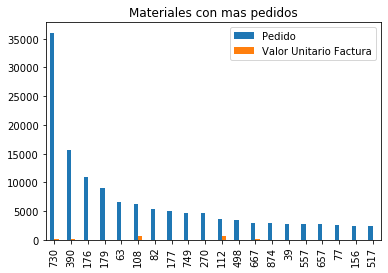

In [32]:
materialesdf = final_df[['Nombre Material','Pedido', 'Valor Unitario Factura']].groupby('Nombre Material').agg({'Pedido':'count','Valor Unitario Factura':'mean'}).reset_index()
materialesdf.sort_values(by='Pedido', ascending=False).head(20).plot(kind='bar')
plt.title('Materiales con mas pedidos');
materialesdf.sort_values(by='Pedido',  ascending=False).head(20)

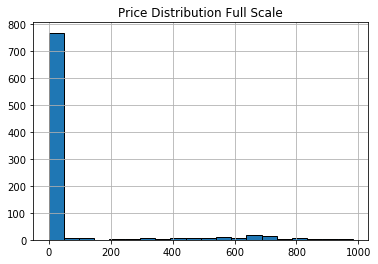

In [33]:
plt.title('Price Distribution Full Scale')
plt.hist(materialesdf['Valor Unitario Factura'], bins=20, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

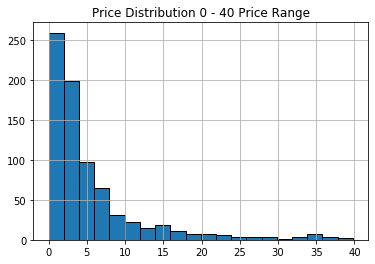

In [34]:
plt.title('Price Distribution 0 - 40 Price Range')
plt.hist(materialesdf[materialesdf['Valor Unitario Factura']<40]['Valor Unitario Factura'], bins=20, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [35]:
dfx = final_df[['Nombre Fabricante','Nombre Material','Categoria_Producto']].groupby(['Nombre Fabricante','Nombre Material']).size().reset_index()[['Nombre Fabricante','Nombre Material']]

In [36]:
dfx[dfx['Nombre Fabricante'] == 'AGROINDUSTRIAL MOLINO SONORA A.P S.']

,Nombre Fabricante,Nombre Material
0,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Alcaraván 450g x 25 und
1,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Sonora 250g x 50 und
2,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Sonora 500g x 25 und
3,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Sonora Premium 1000g x 15 und
4,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Valle Grande 450g x 25 und


In [37]:
dfx.head(20)

,Nombre Fabricante,Nombre Material
0,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Alcaraván 450g x 25 und
1,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Sonora 250g x 50 und
2,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Sonora 500g x 25 und
3,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Sonora Premium 1000g x 15 und
4,AGROINDUSTRIAL MOLINO SONORA A.P S.,Arroz Valle Grande 450g x 25 und
5,ARROCERA LA ESMERALDA S.A.S,Blanquita x 500 g 1/2 arroba
6,ARROCERA LA ESMERALDA S.A.S,Paqte Blanquita x 500 g
7,ARROCERA LA ESMERALDA S.A.S,Paqte Esmeralda x 500 g
8,ARROZ FLORHUILA S.A,Florhuila Arroba 25 unid. x 500 g
9,ARROZ FLORHUILA S.A,Florhuila Paquete 50 unid. X 250 g


In [38]:
final_df[['UM','UM.2']]

,UM,UM.2
0,UN,NaN
1,UN,NaN
2,UN,NaN
3,UN,NaN
4,UN,NaN
...,...,...
55190,PAQ,NaN
55191,BOL,NaN
55192,DIS,NaN
55193,UN,NaN


In [39]:
final_df_r = final_df[['Pedido','Fecha Pedido','Nombre Tienda',
                       'Dirección Tienda','Nombre Fabricante',
                       'Nombre Material','Cantidad de pedido','UM',
                      'Valor Unitario Pedido','Valor Total Pedido',
                      'Ctd.facturada','UM','Valor Unitario Factura',
                      'Valor TotalFactura','Descuento Teaté',
                       'Denominación Motivo Rechazo','Cupón Dscto',
                      'Valor Cupón Teaté','Fecha Creación Tienda',
                      'Nombre ZonaComercial','Comuna','Barrio','Población']]

In [40]:
final_df_r.head()

,Pedido,Fecha Pedido,Nombre Tienda,Dirección Tienda,Nombre Fabricante,Nombre Material,Cantidad de pedido,UM,Valor Unitario Pedido,Valor Total Pedido,...,Valor TotalFactura,Descuento Teaté,Denominación Motivo Rechazo,Cupón Dscto,Valor Cupón Teaté,Fecha Creación Tienda,Nombre ZonaComercial,Comuna,Barrio,Población
0,1000092736,2/01/2020,Tienda de memo,Cr 58 # 48 sur 15,DETERGENTES LTDA.,Detergente Dersa Liquido Doy Pack,6,UN,2.95,17.7,...,0,"0,00",No hay stock suficiente,MENE0120,"0,00",27/12/2019,NaN,NaN,NaN,NaN
1,1000092736,2/01/2020,Tienda de memo,Cr 58 # 48 sur 15,JOHNSON & JOHNSON DE COLOMBIA S.A,JOHNSONS baby aceite original 50 ML,1,UN,0.00,0,...,0,"0,00",Dirección Incorrecta,MENE0120,"0,00",27/12/2019,NaN,NaN,NaN,NaN
2,1000092736,2/01/2020,Tienda de memo,Cr 58 # 48 sur 15,PRODUCTOS YUPI S.A.S,Palomitas Caramelo 68 gr,6,UN,0.00,0,...,0,"0,00",Dirección Incorrecta,MENE0120,"0,00",27/12/2019,NaN,NaN,NaN,NaN
3,1000092736,2/01/2020,Tienda de memo,Cr 58 # 48 sur 15,PROCTER & GAMBLE COLOMBIA LTDA,Detergente Rindex 10 250gr,3,UN,0.00,0,...,0,"0,00",Dirección Incorrecta,MENE0120,"0,00",27/12/2019,NaN,NaN,NaN,NaN
4,1000092736,2/01/2020,Tienda de memo,Cr 58 # 48 sur 15,JOHNSON & JOHNSON DE COLOMBIA S.A,JOHNSONS baby aceite original 50 ML,4,UN,3.50,14,...,0,"0,00",Dirección Incorrecta,MENE0120,"0,00",27/12/2019,NaN,NaN,NaN,NaN


In [41]:
list(final_df_r.columns)

['Pedido',
 'Fecha Pedido',
 'Nombre Tienda',
 'Dirección Tienda',
 'Nombre Fabricante',
 'Nombre Material',
 'Cantidad de pedido',
 'UM',
 'Valor Unitario Pedido',
 'Valor Total Pedido',
 'Ctd.facturada',
 'UM',
 'Valor Unitario Factura',
 'Valor TotalFactura',
 'Descuento Teaté',
 'Denominación Motivo Rechazo',
 'Cupón Dscto',
 'Valor Cupón Teaté',
 'Fecha Creación Tienda',
 'Nombre ZonaComercial',
 'Comuna',
 'Barrio',
 'Población']

<h1> Análisis de poblaciones
   

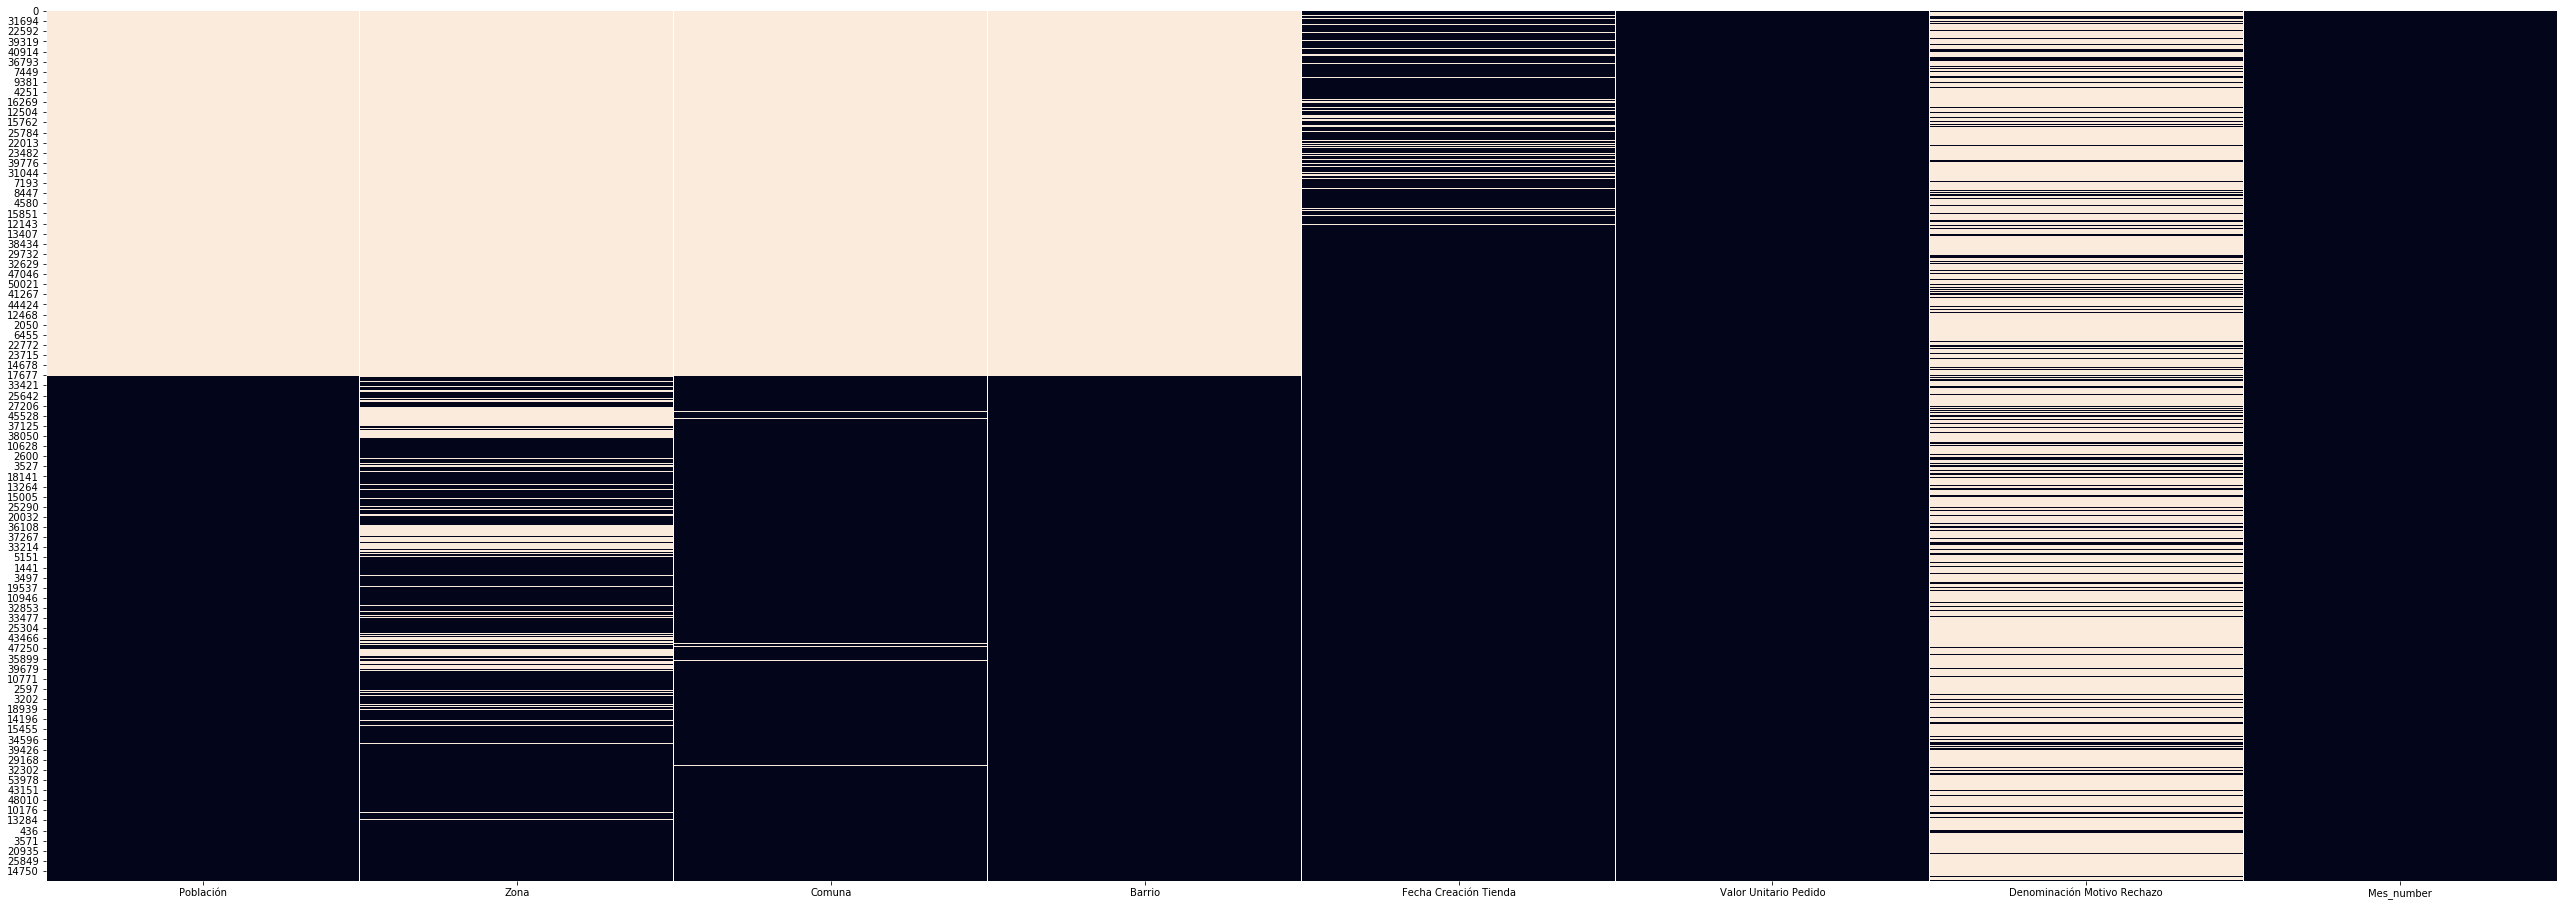

In [48]:
plt.figure(figsize=(45, 16))
null_df_review = final_df[['Población','Zona','Comuna','Barrio','Fecha Creación Tienda','Valor Unitario Pedido','Denominación Motivo Rechazo','Mes_number']]
sns.heatmap(null_df_review.sort_values(by='Mes_number', ascending=True).isnull(),cbar=False)

In [43]:
pivotpoblacionesdf = pd.pivot_table(final_df, values='Pedido', index='Población', columns='Mes_number', aggfunc='count', margins=True)
pivotpoblacionesdf.sort_values(by=7, ascending=False) 
#pivotpoblacionesdf#.columns


Mes_number,4,5,6,7,All
Población,,,,,
All,46407.0,39216.0,47785.0,55195.0,188603
Santiago de cali,26199.0,21150.0,27181.0,30798.0,105328
Medellín,7048.0,7206.0,8594.0,10625.0,33473
Yumbo,4637.0,4498.0,4250.0,4359.0,17744
Jamundí,3081.0,2148.0,2759.0,2692.0,10680
Medellin,1438.0,1378.0,1622.0,1622.0,6060
Candelaria,23.0,10.0,6.0,1536.0,1575
Envigado,753.0,632.0,755.0,1218.0,3358
Itaguí,359.0,298.0,486.0,961.0,2104


In [44]:
pivot_tiendas_df = pd.pivot_table(final_df, values='Nombre Tienda', index='Población', columns='Mes_number', aggfunc=pd.Series.nunique, margins=True)
pivot_tiendas_df.sort_values(by=7, ascending=False) 
#pivotpoblacionesdf#.columns

Mes_number,4,5,6,7,All
Población,,,,,
All,3432.0,3550.0,4195.0,4398.0,6072
Santiago de cali,1663.0,1777.0,2203.0,2222.0,2843
Medellín,973.0,965.0,1046.0,1159.0,1797
Yumbo,196.0,198.0,221.0,225.0,304
Medellin,195.0,220.0,219.0,220.0,384
Jamundí,157.0,172.0,179.0,187.0,243
Candelaria,4.0,3.0,2.0,153.0,156
Itaguí,43.0,34.0,115.0,140.0,189
Envigado,90.0,83.0,113.0,127.0,165


In [47]:
final_df.columns

Index(['Pedido', 'Fecha Pedido', 'Tienda', 'Nombre Tienda', 'Dirección Tienda',
       'Fabricante', 'Nombre Fabricante', 'PosPed', 'Material',
       'Nombre Material', 'Cantidad de pedido', 'UM', 'Valor Unitario Pedido',
       'Mon.', 'Valor Total Pedido', 'Mon..1', 'Valor Total Ped Dcto+IVA',
       'Mon..2', 'Entrega', 'Factura', 'Fecha Factura', 'PosFac',
       'Ctd.facturada', 'UM.1', 'UM.2', 'Valor Unitario Factura', 'Mon..3',
       'Valor TotalFactura', 'Mon..4', 'Descuento Teaté', 'Mon..5', 'MR',
       'Denominación Motivo Rechazo', 'FechaMovil', 'HoraMovil',
       'ValorIngresoPedido', 'Mon..6', 'ValorIngresoFactur', 'Mon..7', 'Ce.',
       'NTAT Móvil', 'Cupón Dscto', 'Valor Cupón Teaté', 'Mon..8',
       'Fecha Creación Tienda', 'MES', 'Mes', 'Mes_number', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Zona', 'Nombre ZonaComercial', 'Ruta',
       'Nombre Ruta', 'Comuna', 'Barrio', 'Población', 'Categoria_Producto'],
      dtype='object')

In [56]:
direccionesdf = final_df[['Dirección Tienda','Mes_number']]#.groupby('Mes_number', as_index=False).count()
direccionesdf = direccionesdf[direccionesdf['Mes_number'].isin([1,2,3])]
direccionesdf['Dirección Tienda'].unique()

array(['Cr 58 # 48 sur 15', 'CR 63a#103g-72', 'CL 99a#52-91', ...,
       'CL 88b#51b-03', 'CR 34#75c-31', 'CL 101a#74b-05'], dtype=object)